Analyzing renting Data

Import libraries and establish df for rent

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder

df_rent = pd.read_csv('df_cleaned_rent.csv')
df = pd.read_csv('DF_cleaned.csv')

df

,Unnamed: 0,Url,BathroomCount,BedroomCount,ConstructionYear,Country,District,Fireplace,FloodingZone,Furnished,...,SubtypeOfProperty,SurfaceOfPlot,SwimmingPool,Terrace,ToiletCount,TypeOfProperty,TypeOfSale,Condition_Rank,PEB_Rank,Kitchen_Rank
0,2,https://www.immoweb.be/en/classified/apartment...,1,1,1969,Belgium,Brugge,0,NON_FLOOD_ZONE,0,...,flat_studio,333,0,1,1,2,residential_sale,4,6,3
1,8,https://www.immoweb.be/en/classified/house/for...,2,4,2008,Belgium,Brugge,0,NON_FLOOD_ZONE,1,...,house,0,0,0,2,1,residential_sale,4,6,3
2,10,https://www.immoweb.be/en/classified/house/for...,1,4,2002,Belgium,Veurne,0,NON_FLOOD_ZONE,0,...,house,170,0,1,2,1,residential_sale,3,2,3
3,11,https://www.immoweb.be/en/classified/apartment...,0,2,1972,Belgium,Hasselt,0,NON_FLOOD_ZONE,0,...,apartment,333,0,1,1,2,residential_sale,6,6,3
4,14,https://www.immoweb.be/en/classified/apartment...,1,1,1994,Belgium,Brussels,0,NON_FLOOD_ZONE,1,...,apartment,333,0,1,1,2,residential_sale,6,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111295,181788,https://www.immoweb.be/en/classified/house/for...,1,3,2024,Belgium,Gent,0,NON_FLOOD_ZONE,0,...,house,234,0,0,0,1,residential_sale,4,6,3
111296,181789,https://www.immoweb.be/en/classified/house/for...,4,4,2002,Belgium,Antwerp,0,NON_FLOOD_ZONE,0,...,apartment_block,202,0,0,1,1,residential_sale,5,5,3
111297,181790,https://www.immoweb.be/en/classified/apartment...,1,2,2002,Belgium,Antwerp,0,NON_FLOOD_ZONE,0,...,apartment,333,0,1,1,2,residential_sale,4,4,4
111298,181791,https://www.immoweb.be/en/classified/apartment...,1,2,2002,Belgium,Brugge,0,POSSIBLE_FLOOD_ZONE,0,...,apartment,333,0,1,1,2,residential_sale,4,4,3


In [42]:
df_rent.columns

Index(['BathroomCount', 'BedroomCount', 'ConstructionYear', 'District',
       'Fireplace', 'Garden', 'GardenArea', 'Kitchen', 'LivingArea',
       'Locality', 'MonthlyCharges', 'NumberOfFacades', 'PEB', 'PostalCode',
       'Price', 'PropertyId', 'Province', 'Region', 'RoomCount', 'ShowerCount',
       'StateOfBuilding', 'SubtypeOfProperty', 'SurfaceOfPlot', 'SwimmingPool',
       'Terrace', 'ToiletCount', 'TypeOfSale', 'Condition_Rank', 'PEB_Rank',
       'Kitchen_Rank'],
      dtype='object')

Monthly charge distribution

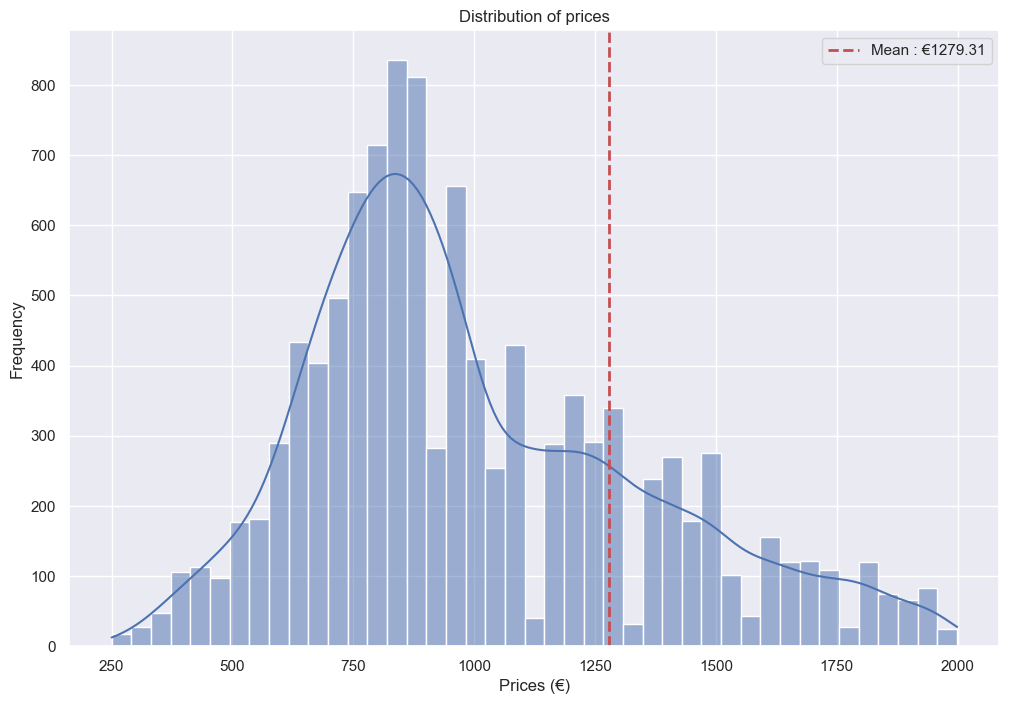

In [43]:
import seaborn as sns
df_average_price = df_rent['Price'].mean()
#df[''] < 800000

df_filtered = df_rent[df_rent['Price'] < 2000]

#df_average_price = df_filtered[''].mean()
sns.set_theme()
plt.figure(figsize=(12, 8))
sns.histplot(df_filtered['Price'], kde=True) 
plt.title('Distribution of prices')
plt.xlabel('Prices (€)')
plt.ylabel('Frequency')
plt.axvline(df_average_price, color='r', linestyle='--', linewidth=2, label=f'Mean : €{df_average_price:.2f}')  
plt.legend()
plt.show()

Living area distribution

C:\Users\pieta\AppData\Local\Temp\ipykernel_22180\1402919772.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df_filtered['LivingArea'], kde=True, bins=30, palette='Blues_d')


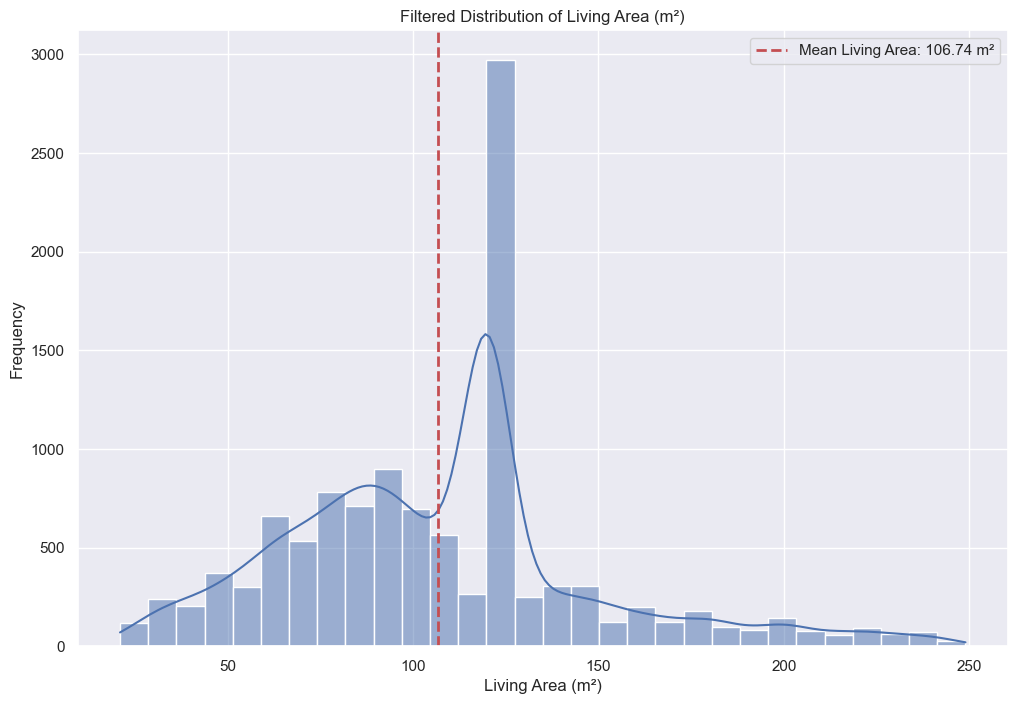

In [44]:

df_filtered = df_rent[(df_rent['LivingArea'] < 250) & (df_rent['LivingArea'] > 20)]  

df_average_Area = df_filtered['LivingArea'].mean()

plt.figure(figsize=(12, 8))
sns.histplot(df_filtered['LivingArea'], kde=True, bins=30, palette='Blues_d')
plt.title('Filtered Distribution of Living Area (m²)')
plt.xlabel('Living Area (m²)')
plt.ylabel('Frequency')
plt.axvline(df_average_Area, color='r', linestyle='--', linewidth=2, label=f'Mean Living Area: {df_average_Area:.2f} m²')
plt.legend()
plt.show()

Year of construction distribution 


C:\Users\pieta\AppData\Local\Temp\ipykernel_22180\659464017.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_price_contruct_year['Decade'] = (df_price_contruct_year['ConstructionYear'] // 10) * 10


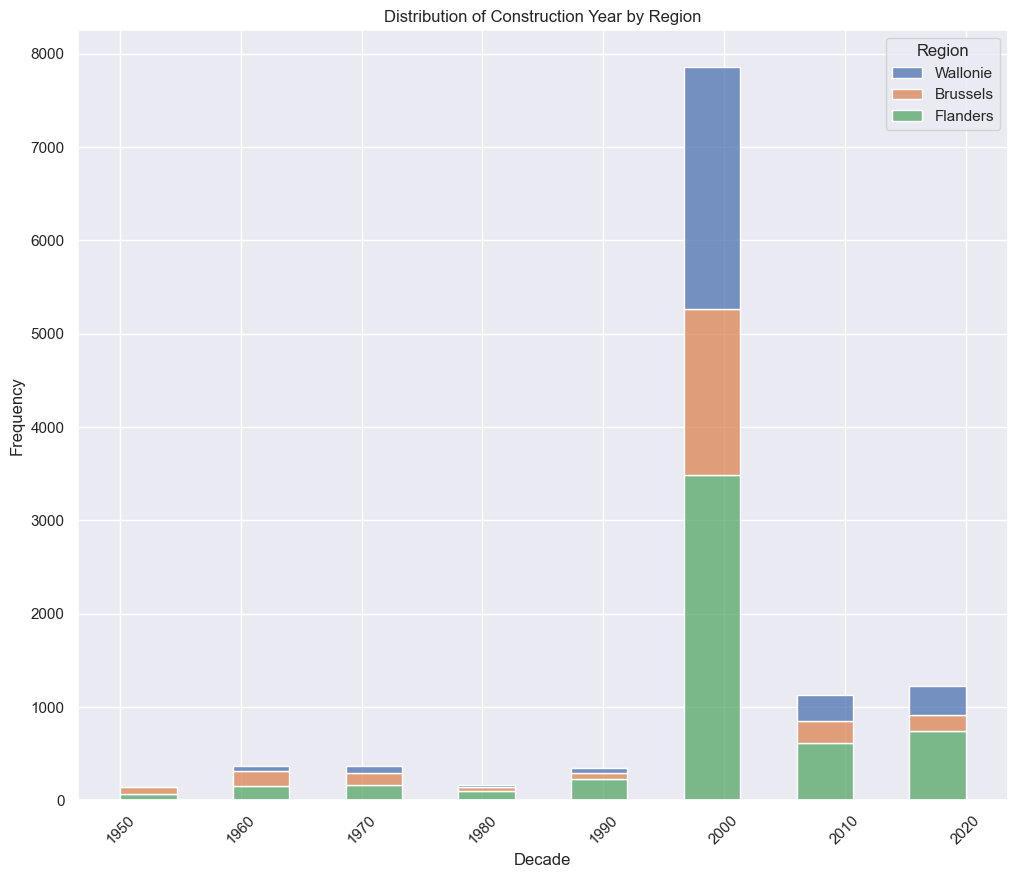

In [45]:


df = pd.read_csv('df_cleaned_rent.csv')


df_price_contruct_year = df[(df['ConstructionYear'] > 1950)]


df_price_contruct_year['Decade'] = (df_price_contruct_year['ConstructionYear'] // 10) * 10


plt.figure(figsize=(12, 10))
sns.histplot(df_price_contruct_year, x='Decade', hue='Region', kde=False,  multiple='stack')
plt.title('Distribution of Construction Year by Region')
plt.xlabel('Decade')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Lets analyze some correlations with the rent price

- year of construction
- region
- type of property
- room count
- state of building


Relationship between Median Price and Region

C:\Users\pieta\AppData\Local\Temp\ipykernel_22180\383239492.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Decade'] = (df_filtered['ConstructionYear'] // 10) * 10
C:\Users\pieta\AppData\Local\Temp\ipykernel_22180\383239492.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data_agg, x='Decade', y='Price',  palette='Blues_d')


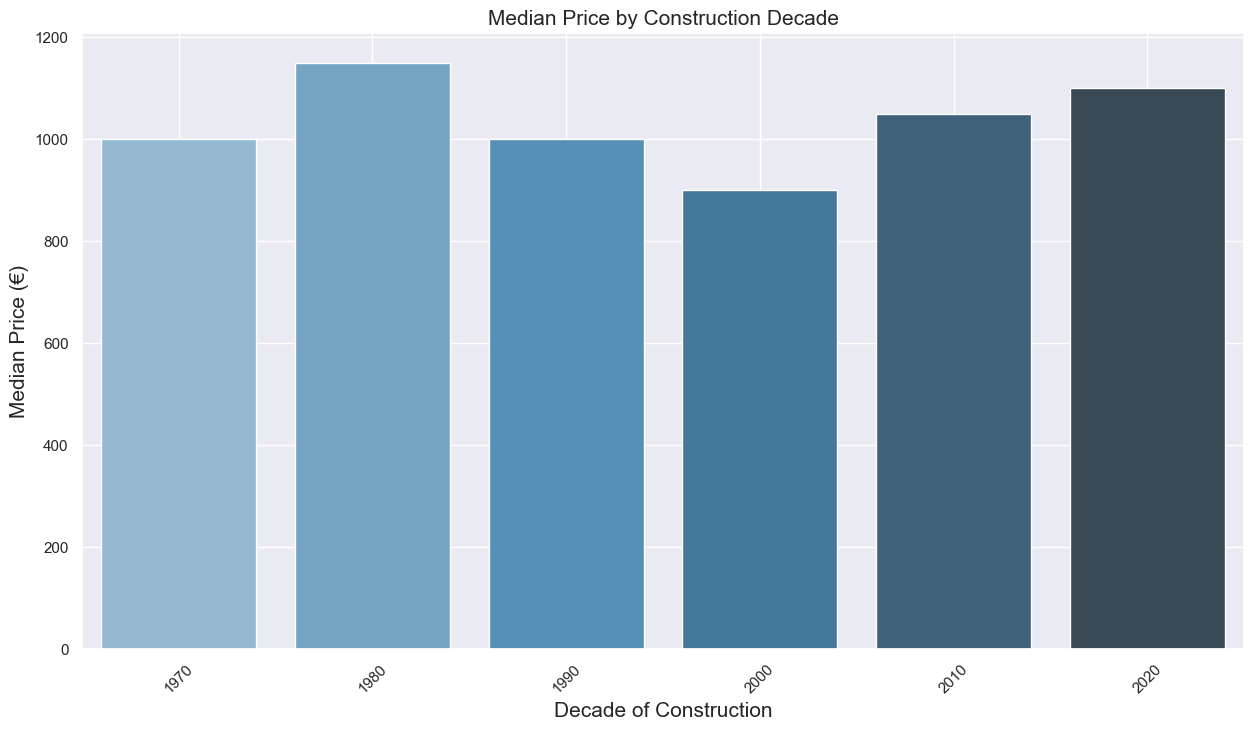

Correlation between Price and ConstructionYear:
                      Price  ConstructionYear
Price             1.000000         -0.211512
ConstructionYear -0.211512          1.000000


In [46]:


df = pd.read_csv('df_cleaned_rent.csv')


df_filtered = df[(df['ConstructionYear'] > 1970)]


df_filtered['Decade'] = (df_filtered['ConstructionYear'] // 10) * 10


data_agg = df_filtered.groupby('Decade')['Price'].median().reset_index()


plt.figure(figsize=(15, 8))
sns.barplot(data=data_agg, x='Decade', y='Price',  palette='Blues_d')
plt.title('Median Price by Construction Decade',fontsize=15)
plt.xlabel('Decade of Construction',fontsize=15)
plt.ylabel('Median Price (€)',fontsize=15)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()




correlation = df[['Price', 'ConstructionYear']].corr()
print("Correlation between Price and ConstructionYear:\n", correlation)


Relationship between Price and Type of Property

C:\Users\pieta\AppData\Local\Temp\ipykernel_22180\854002280.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_price_region, x='Region', y='Price', palette='Blues_d')


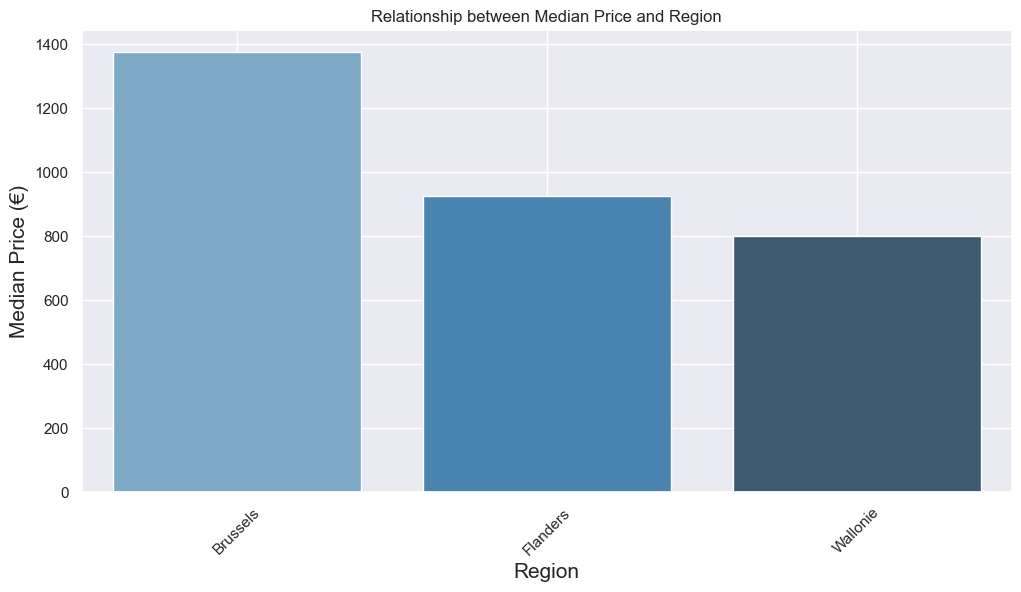

,Price,Region_encoded
Price,1.000000,-0.116282
Region_encoded,-0.116282,1.000000


In [47]:

df = pd.read_csv('df_cleaned_rent.csv')

df_filtered = df[(df['Price'] < 3000) &
                 (df['Price'] != 0)]

df_price_region = df_filtered.groupby('Region')['Price'].median().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=df_price_region, x='Region', y='Price', palette='Blues_d')
plt.title('Relationship between Median Price and Region')
plt.xlabel('Region', fontsize=15)
plt.ylabel('Median Price (€)', fontsize=15)
plt.xticks(rotation=45)  
plt.grid(True)
plt.show()



df = pd.read_csv('DF_cleaned.csv')


property_map = {
    1: 'Brussel',
    2: 'Flanders',
    3: 'Wallonie'
}


df['Region'] = df['Region'].replace(property_map)


le = LabelEncoder()
df['Region_encoded'] = le.fit_transform(df['Region'])


df[['Price', 'Region_encoded']].corr()

Relationship between Price and Provinces


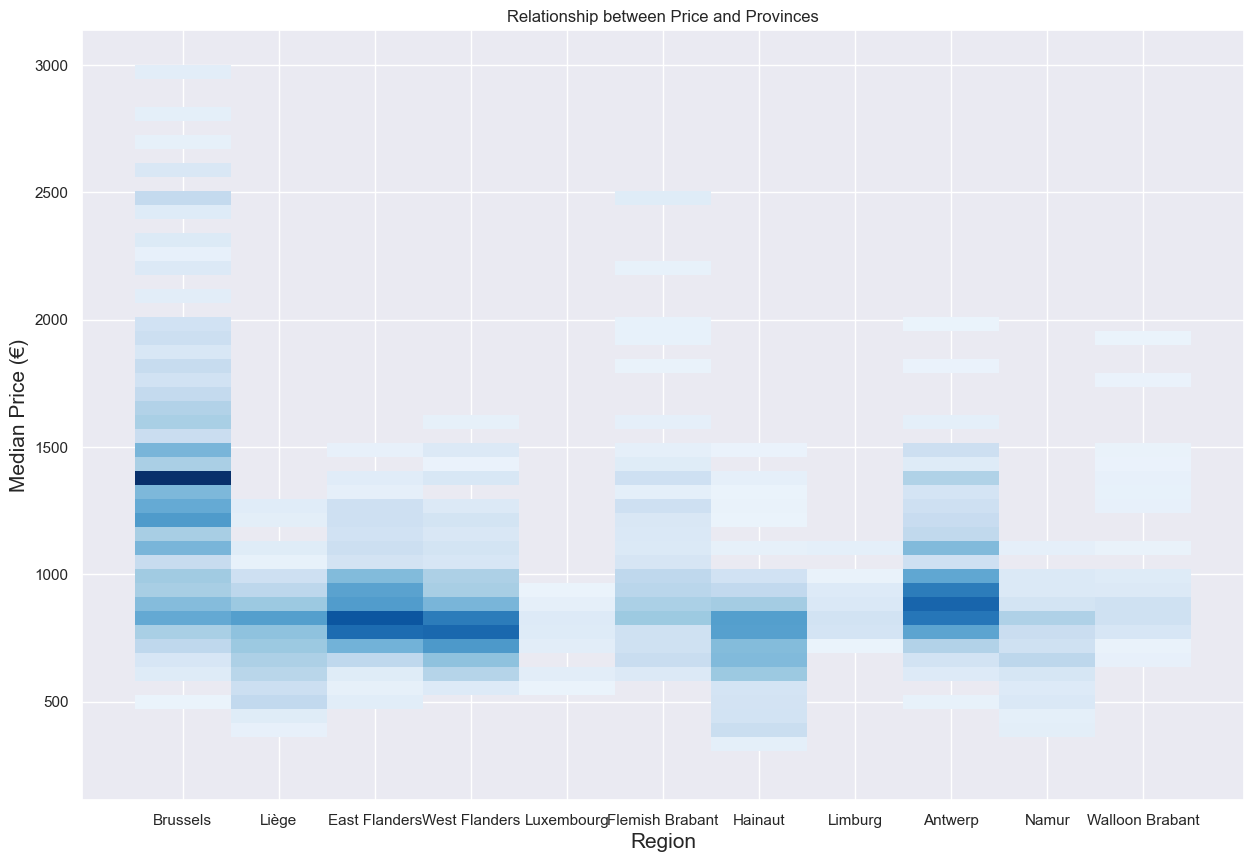

In [48]:
df = pd.read_csv('df_cleaned_rent.csv')

df_price_filtered = df[(df['ConstructionYear'] > 1950) & 
                       (df['Price'] < 3000) & 

                       (df['Price'] != 0)]

df_price_provinces = df_filtered.groupby('Province')['Price'].median().reset_index()

plt.figure(figsize=(15, 10))
sns.histplot(data=df_price_filtered,x='Province', y='Price', bins=50, pthresh=0.1, cmap='Blues')
plt.title('Relationship between Price and Provinces')
plt.xlabel('Region',fontsize=15)
plt.ylabel('Median Price (€)', fontsize=15)
plt.show()

Relationship between Price and Subtype of Property

C:\Users\pieta\AppData\Local\Temp\ipykernel_22180\136867566.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_price_filtered['TypeOfProperty'] = df_price_filtered['SubtypeOfProperty'].replace(property_map)
C:\Users\pieta\AppData\Local\Temp\ipykernel_22180\136867566.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_price_provinces, x='SubtypeOfProperty', y='Price',palette='Blues_d')


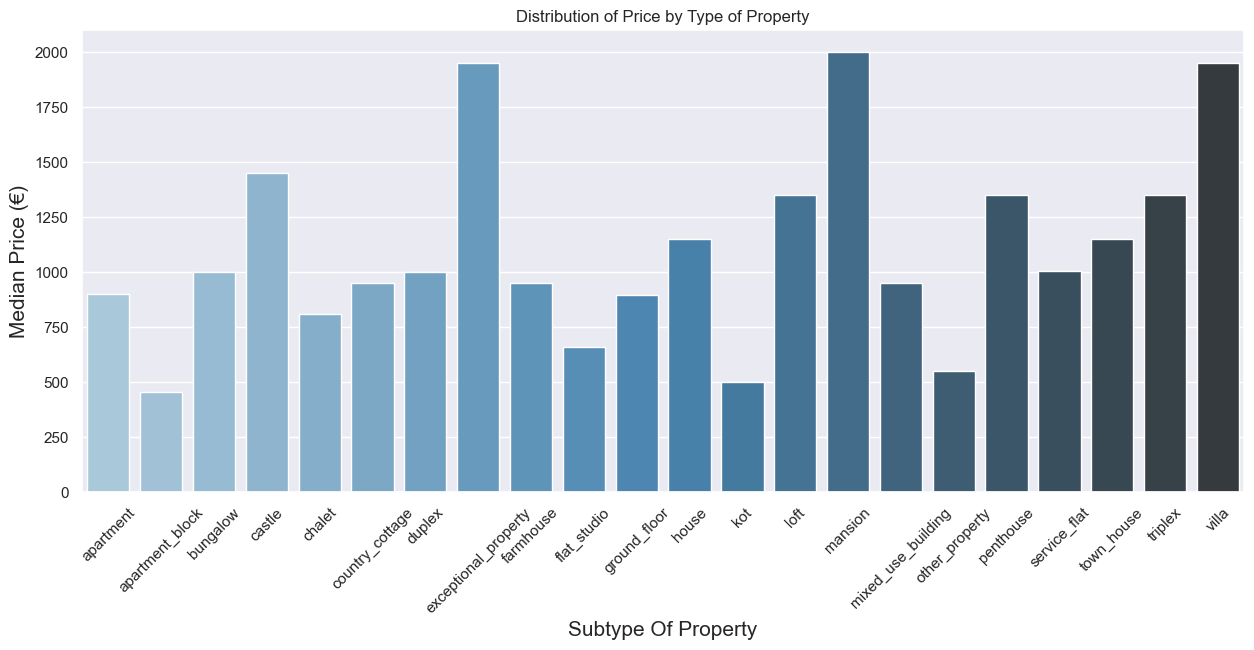

In [49]:

df = pd.read_csv('DF_cleaned_rent.csv')


df_price_filtered = df[(df['ConstructionYear'] > 1970) & 
                       (df['Price'] < 3000)]



property_map = {1: 'Houses', 2: 'Apartments'}


df_price_filtered['TypeOfProperty'] = df_price_filtered['SubtypeOfProperty'].replace(property_map)

df_price_provinces = df_price_filtered.groupby('SubtypeOfProperty')['Price'].median().reset_index()


sns.color_palette()
plt.figure(figsize=(15, 6))
sns.barplot(data=df_price_provinces, x='SubtypeOfProperty', y='Price',palette='Blues_d')
plt.title('Distribution of Price by Type of Property')
plt.xlabel('Subtype Of Property', fontsize=15)
plt.ylabel('Median Price (€)', fontsize=15)
plt.xticks(rotation=45)
plt.show()


#df[['Price', 'SubtypeOfProperty']].corr(method='spearman')

Relationship between Price and Living Area

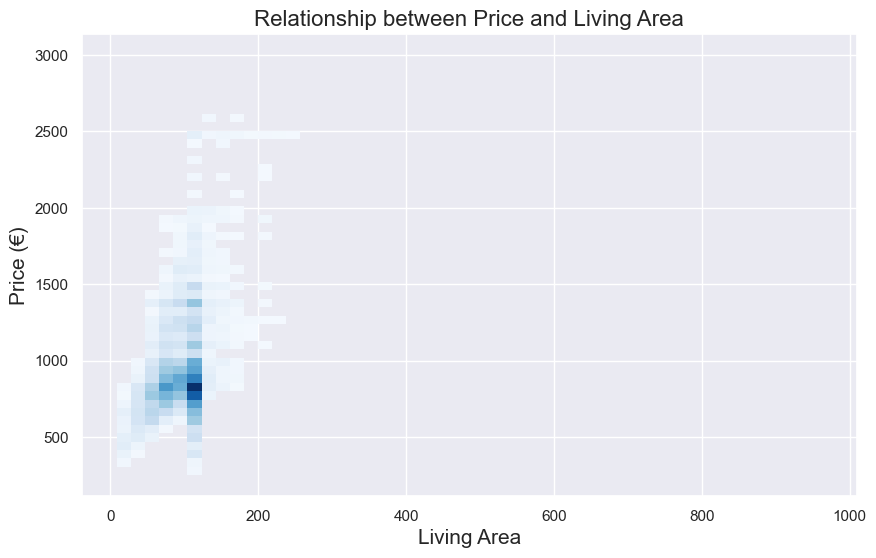

,Price,LivingArea
Price,1.000000,0.699554
LivingArea,0.699554,1.000000


In [50]:

df = pd.read_csv('df_cleaned_rent.csv')


df_price_filtered = df[
                       (df['Price'] < 3000) &

                       (df['Price'] != 0)]



plt.figure(figsize=(10, 6))
sns.histplot(data=df_price_filtered, x='LivingArea', y='Price', bins=50, pthresh=0.1, cmap='Blues')
plt.title('Relationship between Price and Living Area', fontsize=16)
plt.xlabel('Living Area', fontsize=15)
plt.ylabel('Price (€)', fontsize=15)
plt.show()

df[['Price', 'LivingArea']].corr()

Relationship between Price and State of Building

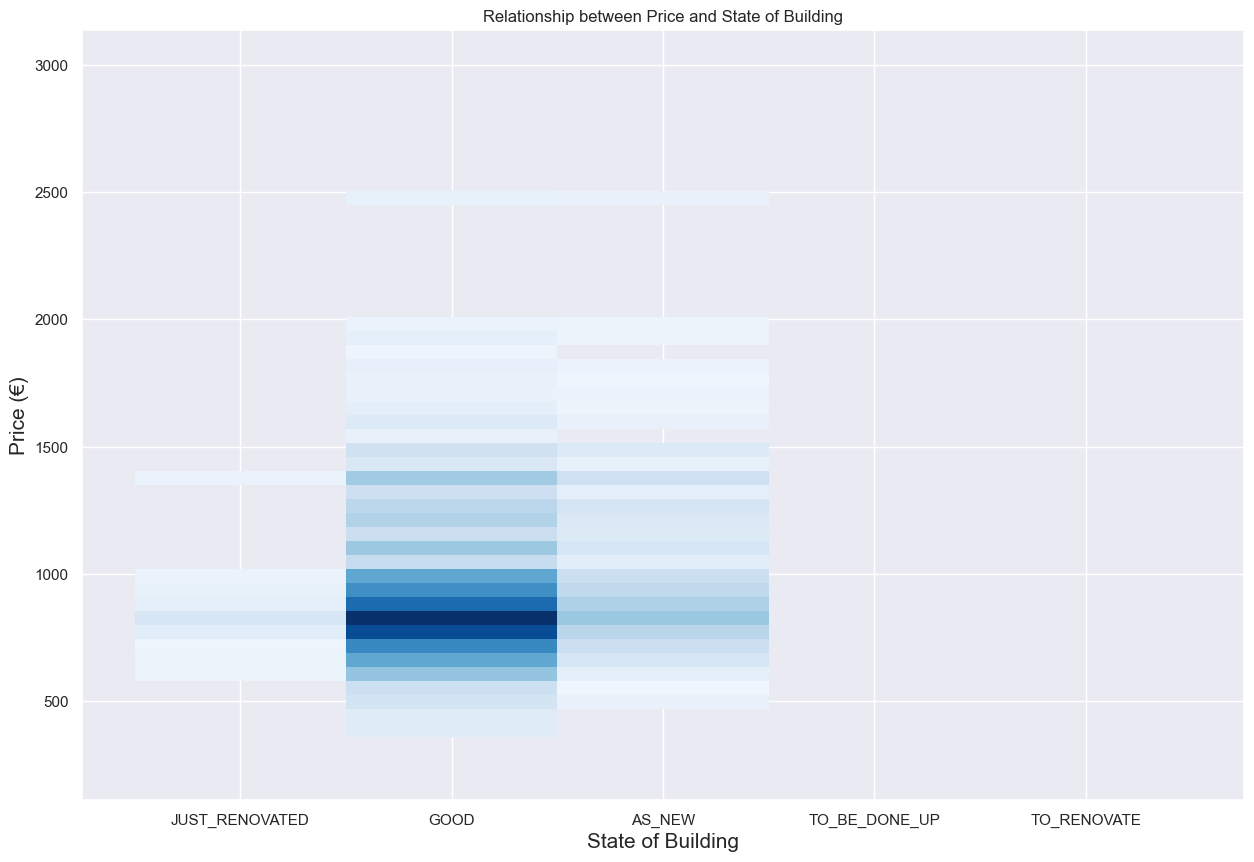

In [51]:

df = pd.read_csv('df_cleaned_rent.csv')

df_price_filtered = df[(df['ConstructionYear'] > 1950) & 
                       (df['Price'] < 3000) & 

                       (df['Price'] != 0)]

plt.figure(figsize=(15, 10))
sns.histplot(data=df_price_filtered,x='StateOfBuilding', y='Price', bins=50, pthresh=0.1, cmap='Blues')
plt.title('Relationship between Price and State of Building')
plt.xlabel('State of Building',fontsize=15)
plt.ylabel('Price (€)', fontsize=15)
plt.show()

Final heatmap for general correlations

Correlation between quantitavies variables

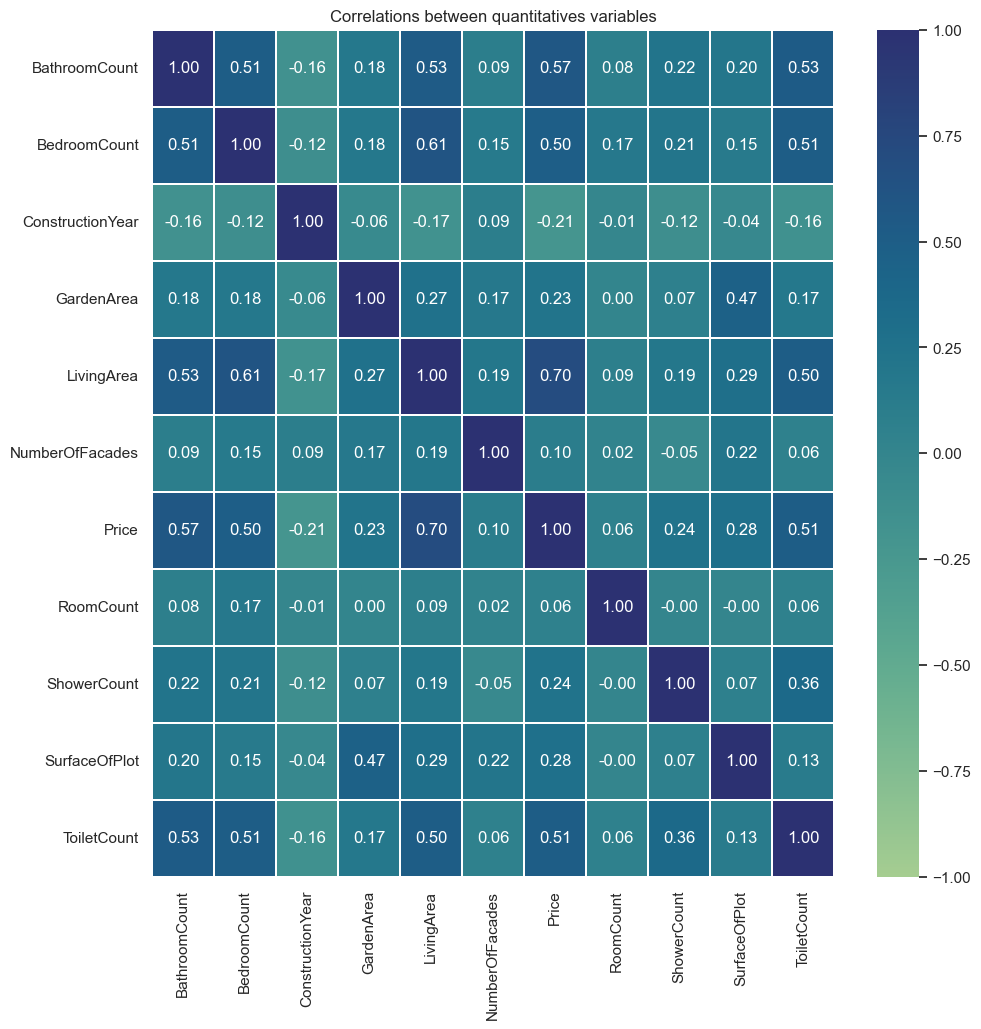

In [54]:
quantitative_columns = [
    'BathroomCount', 'BedroomCount', 'ConstructionYear', 'GardenArea',
    'LivingArea', 'NumberOfFacades', 'Price', 'RoomCount',
    'ShowerCount', 'SurfaceOfPlot', 'ToiletCount'
]

df_quantitative = df[quantitative_columns]

corr_matrix = df_quantitative.corr(method='pearson')


fig, ax = plt.subplots(figsize=(11, 11))
heatmap_plot = sns.heatmap(corr_matrix, ax=ax, annot=True, linewidths=0.05, fmt='.2f', cmap="crest", vmin=-1, vmax=1, center=0)
plt.title("Correlations between quantitatives variables")
plt.show()

Correlation between qualitative variables

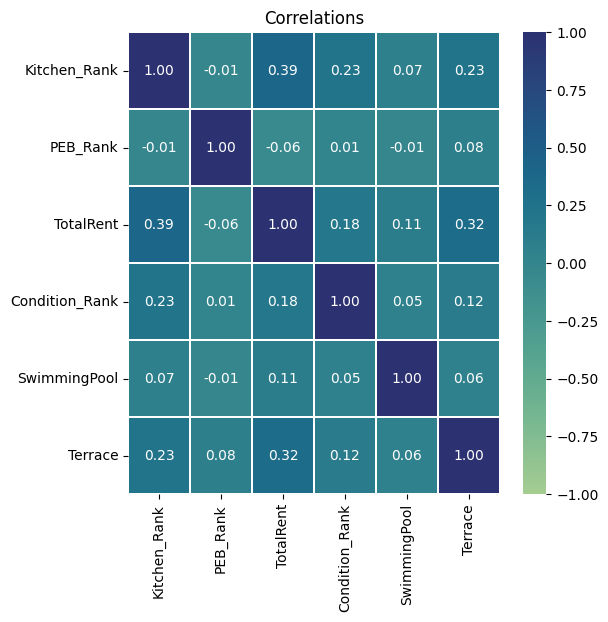

In [4]:
df = pd.read_csv('df_cleaned_rent.csv')
df.describe()
df["TotalRent"] = df["Price"] + df['MonthlyCharges']
qualitative_columns = [
    'Kitchen_Rank', 'PEB_Rank', 'TotalRent', 'Condition_Rank',
    'SwimmingPool', 'Terrace'
]

df_qualitative = df[qualitative_columns]

# Corr Matrix
corr_matrix = df_qualitative.corr(method='spearman')

# Visualize
fig, ax = plt.subplots(figsize=(6, 6))
heatmap_plot = sns.heatmap(corr_matrix, ax=ax, annot=True, linewidths=0.05, fmt='.2f', cmap='crest', vmin=-1, vmax=1, center=0)
plt.title("Correlations")
plt.show()